In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
new_df=pd.read_csv('/content/drive/MyDrive/Asthma/new_asthma.csv')
new_df.head()


,Unnamed: 0,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [5]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

# Model Building

SVM

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
X = new_df.drop('Diagnosis', axis=1)
y = new_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = DecisionTreeClassifier( max_features='sqrt', max_depth=12)
# Fit the model
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9294377067254685
0.8986784140969163
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       479
           1       0.83      0.99      0.90       429

    accuracy                           0.90       908
   macro avg       0.91      0.90      0.90       908
weighted avg       0.91      0.90      0.90       908



In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.10242290748898679

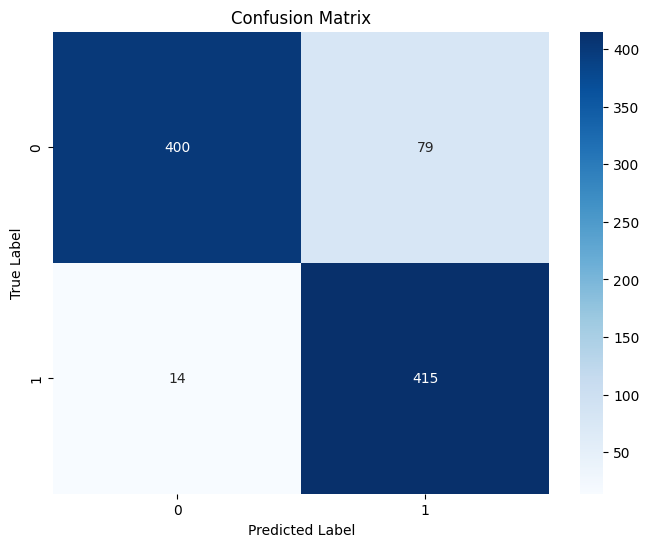

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
class_labels = {
    0: "No",
    1: "Yes"
    }

models = {
    "Decision Tree": clf
}

user_data_list = [
              [[53,0,2,1,37.92302,0,3.741621,2.571249,7.854012,4.12622,7.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]],  #Dataset No
              [[61,1,1,1,27.281,0,4.990117,2.694982,9.56158,1.933415,5.116137,6.170154,1,0,0,0,1,0,2.250033,2.800118,1,0,1,0,0,1]], #Dataset Yes

              [[60,0,1,3,35.92302,0,5.741621,5.571249,8.854012,3.12622,6.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]], #No
             [[61,1,1,1,35.281,0,9.990117,2.694982,9.56158,1.933415,8.116137,7.170154,1,1,1,0,1,0,2.250033,1.800118,1,0,1,0,0,1]], #yes
             [[60,0,1,3,35.92302,0,5.741621,5.571249,8.854012,3.12622,6.916287,0.912935,0,0,0,0,0,0,3.569894,2.75669,0,0,1,0,0,0]], #No
             [[35,1,0,2,28,0,5,5,4,9,9,10,1,1,1,1,1,1,1.8,2.5,1,1,1,1,1,1]],  #No
]

# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        user_data1=pd.DataFrame(user_data, columns=['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking','PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure','PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma','HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux','LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath','ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced'])
        prediction = model.predict(user_data1)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")
    print("\n")

Testing on data: [[53, 0, 2, 1, 37.92302, 0, 3.741621, 2.571249, 7.854012, 4.12622, 7.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Decision Tree Prediction: 0 - No


Testing on data: [[61, 1, 1, 1, 27.281, 0, 4.990117, 2.694982, 9.56158, 1.933415, 5.116137, 6.170154, 1, 0, 0, 0, 1, 0, 2.250033, 2.800118, 1, 0, 1, 0, 0, 1]]
Decision Tree Prediction: 1 - Yes


Testing on data: [[60, 0, 1, 3, 35.92302, 0, 5.741621, 5.571249, 8.854012, 3.12622, 6.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Decision Tree Prediction: 0 - No


Testing on data: [[61, 1, 1, 1, 35.281, 0, 9.990117, 2.694982, 9.56158, 1.933415, 8.116137, 7.170154, 1, 1, 1, 0, 1, 0, 2.250033, 1.800118, 1, 0, 1, 0, 0, 1]]
Decision Tree Prediction: 0 - No


Testing on data: [[60, 0, 1, 3, 35.92302, 0, 5.741621, 5.571249, 8.854012, 3.12622, 6.916287, 0.912935, 0, 0, 0, 0, 0, 0, 3.569894, 2.75669, 0, 0, 1, 0, 0, 0]]
Decision Tree Prediction: 0 - No


Testing on data: [[35, 1, 